<a href="https://colab.research.google.com/github/abdullatif14/Regression_IP_Week7/blob/main/Abdilatif_Regression_IP__week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

##a)Specifying the Queston

What are the factors that affect housing prices using the given information on real estate properties that was collected over the past few months?

##b) Metric for success

1.Find and deal with outliers, anomalies, and missing data within the dataset.

2.Perform univariate, bivariate and multivariate analysis recording your observations.

3.Perform Regression Analysis

4.Provide recommendations


##c) Understanding the context

The dataset contains:-

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

##d)Recording the Experimental Design
We will be required to perform modelling using the given regressions and evaluate thier performances.

1.Multiple Linear Regression

2.Quantile Regression

3.Ridge Regression

4.Lasso Regression

5.Elastic Net Regression

## Reading and cleaning the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#importing the data
housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
housing.shape

#contains 21613 rows and 20 columns

(21613, 20)

In [7]:
#lets check for any missing values
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#We can see the data doesnt have any missing values 
#lets check for duplicates

print(housing.duplicated().any())
print(housing.duplicated().sum())



True
3


In [9]:
# we have 3 duplicates 
#we wont drop these since it doesnt have much effect in our data
# lets check if the data has the right data types

housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
# lets drop some of the unnecessary columns 

housing = housing.drop(columns=['lat','long','id'],axis=1)

In [11]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [12]:
# changing the bathroom to int 
housing['bathrooms'] = housing.bathrooms.astype(int)
print(housing)


          price  bedrooms  bathrooms  ...  zipcode  sqft_living15  sqft_lot15
0      221900.0         3          1  ...    98178           1340        5650
1      538000.0         3          2  ...    98125           1690        7639
2      180000.0         2          1  ...    98028           2720        8062
3      604000.0         4          3  ...    98136           1360        5000
4      510000.0         3          2  ...    98074           1800        7503
...         ...       ...        ...  ...      ...            ...         ...
21608  360000.0         3          2  ...    98103           1530        1509
21609  400000.0         4          2  ...    98146           1830        7200
21610  402101.0         2          0  ...    98144           1020        2007
21611  400000.0         3          2  ...    98027           1410        1287
21612  325000.0         2          0  ...    98144           1020        1357

[21613 rows x 17 columns]


In [13]:
housing.dtypes

price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# checking for unique values in columns
housing.nunique()

price            3625
bedrooms           13
bathrooms           9
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
sqft_living15     777
sqft_lot15       8689
dtype: int64

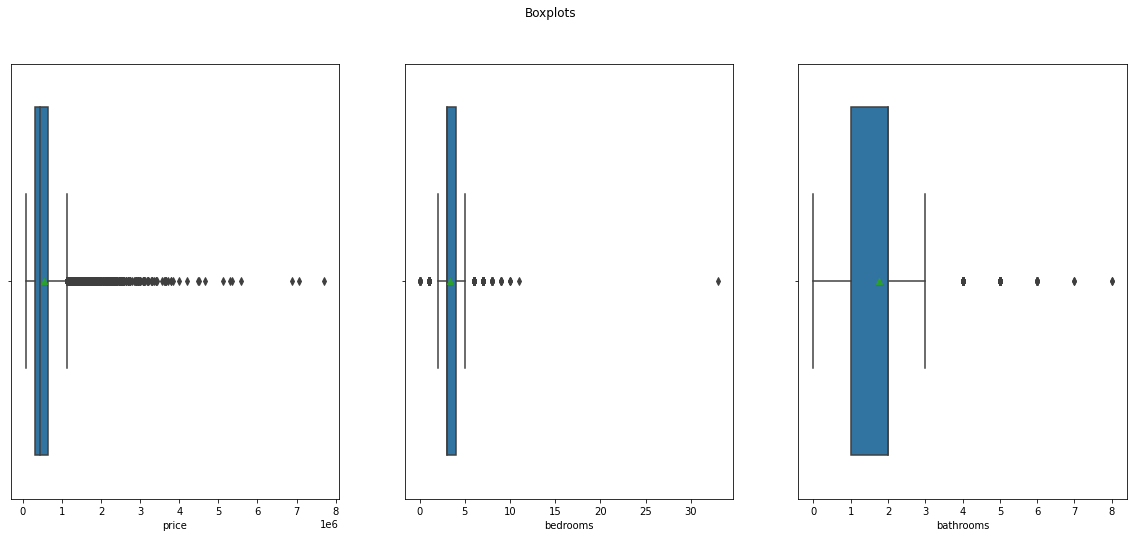

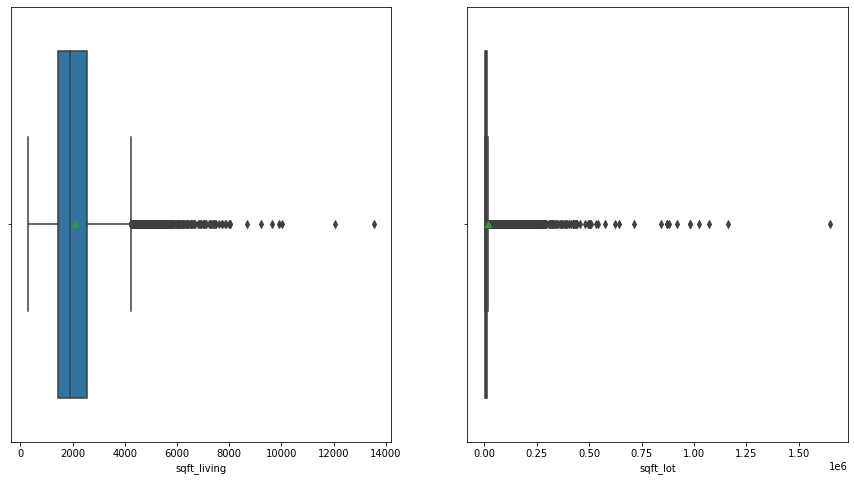

In [15]:
#outliers
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = housing['price'], ax=ax1, showmeans = True)
sns.boxplot(x = housing['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = housing['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5) = plt.subplots(1,2, figsize=(15, 8))
sns.boxplot(x = housing['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = housing['sqft_lot'], ax=ax5, showmeans = True)
plt.show()

In [16]:
# describing the features we have in our dataset 
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.734873,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [4]:
# i think its better if we merge some of the columns
# combining waterfront and view as waterview
housing['waterview'] = housing['waterfront'] + housing['view']
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterview
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [5]:
# selecting the waterview column
housing.loc[(housing.waterview >= 1), ['waterview']]

,waterview
15,3
21,4
49,3
58,4
60,3
...,...
21554,2
21576,5
21579,2
21593,2


In [39]:
# since we have combined the waterfront and view 
# it is safe for us to drop them
new_house = housing.drop(['waterfront','view','id'], 1)
new_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterview
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


###Univarite Analysis

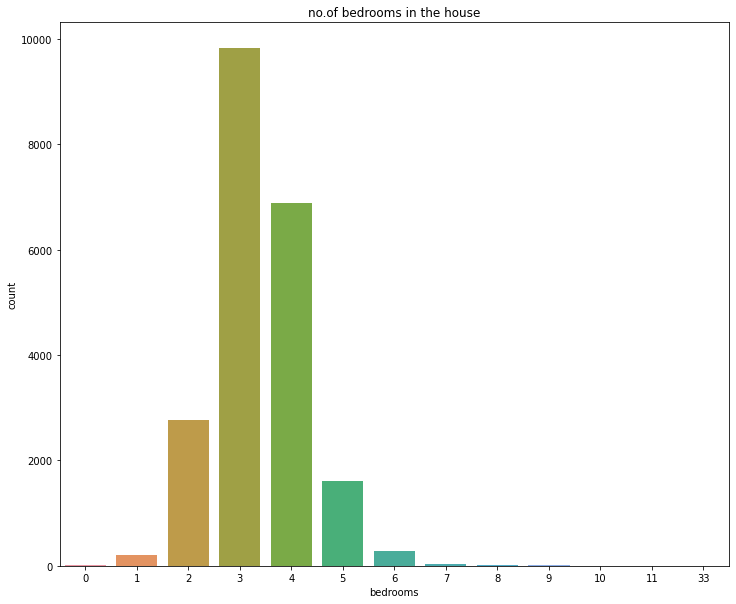

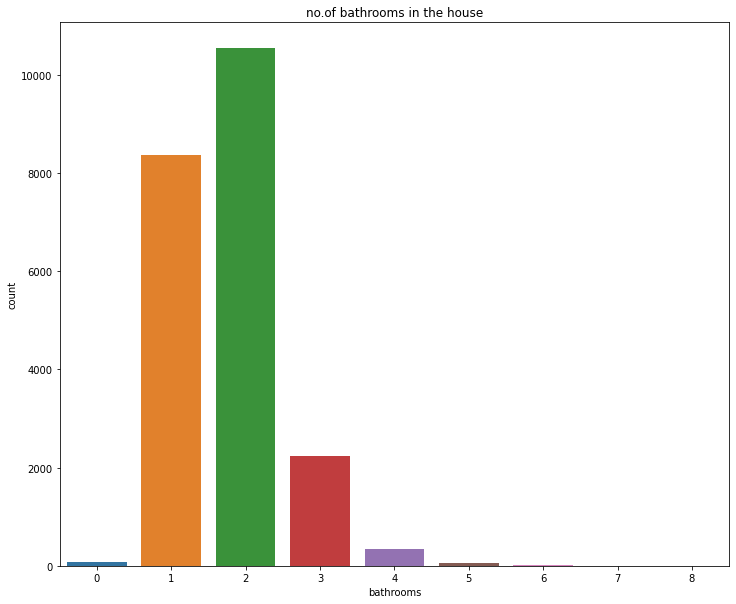

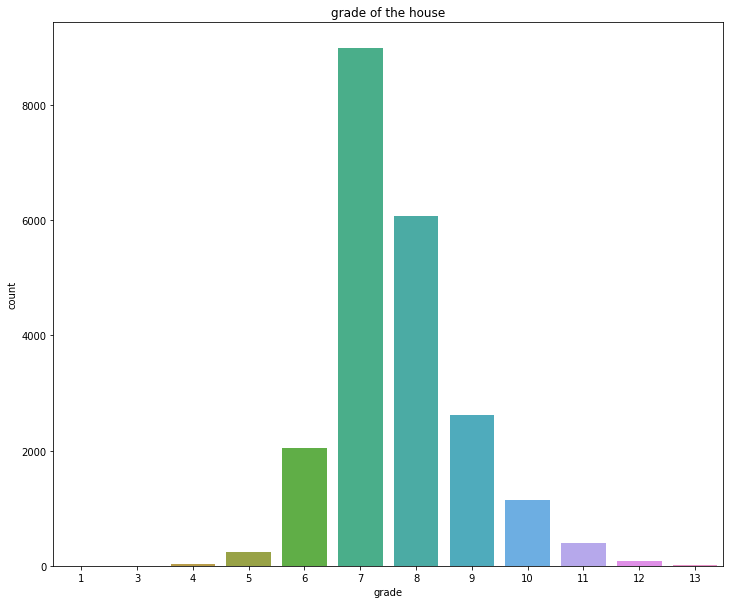

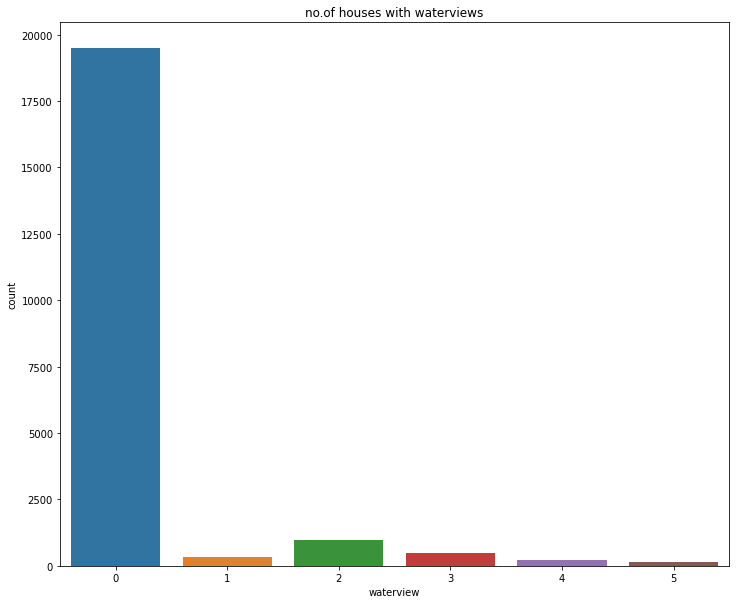

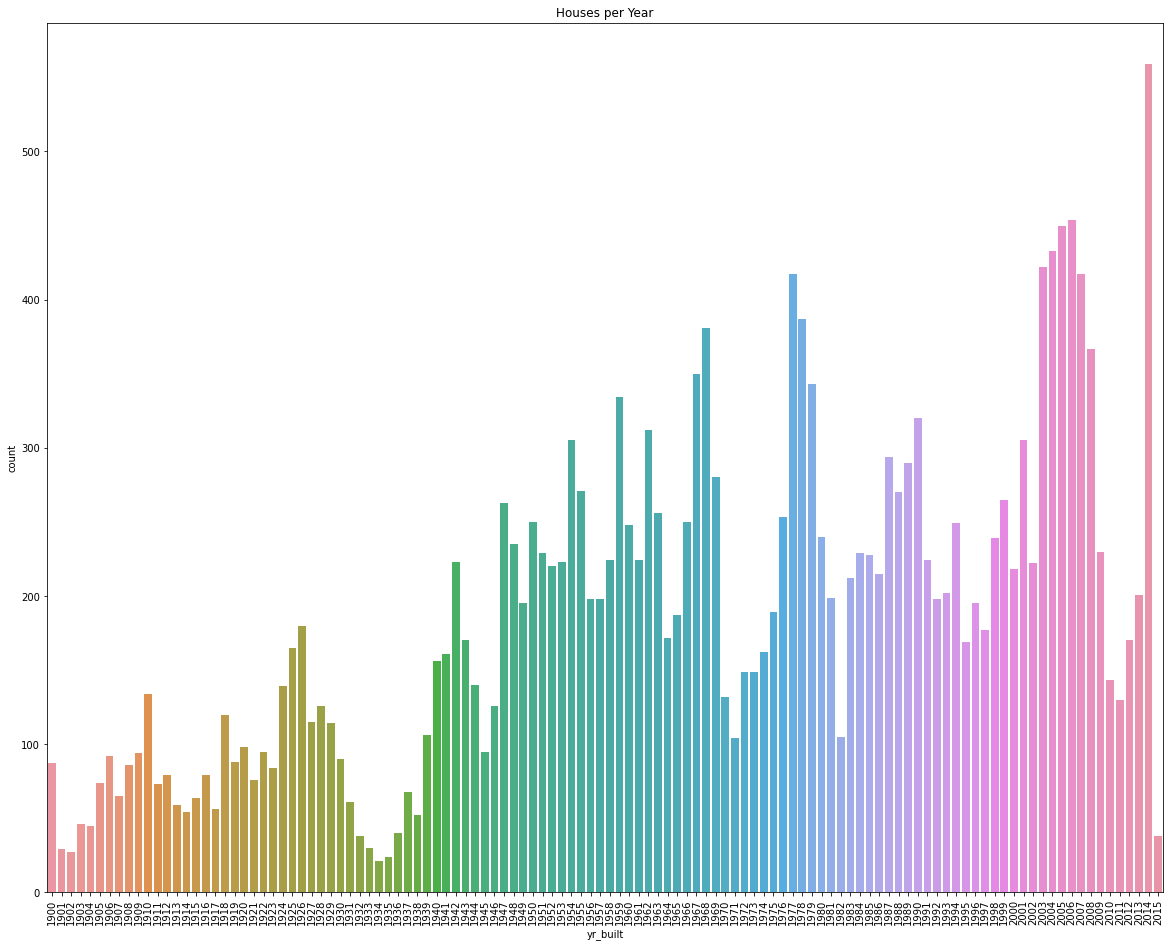

In [19]:
# lets plot some of the variables in  histogram
plt.figure(figsize = [12,10])
sns.countplot(x='bedrooms',data=housing)
plt.title('no.of bedrooms in the house')
plt.show()

plt.figure(figsize = [12,10])
sns.countplot(x='bathrooms',data=housing)
plt.title('no.of bathrooms in the house')
plt.show()

plt.figure(figsize = [12,10])
sns.countplot(x='grade',data=housing)
plt.title('grade of the house')
plt.show()

plt.figure(figsize = [12,10])
sns.countplot(x='waterview',data=housing)
plt.title('no.of houses with waterviews')
plt.show()


plt.figure(figsize = [20,16])
sns.countplot(x='yr_built',data=housing)
plt.title('Houses per Year')
plt.xticks(rotation = 90)
plt.show()

###Bivariate Analysis

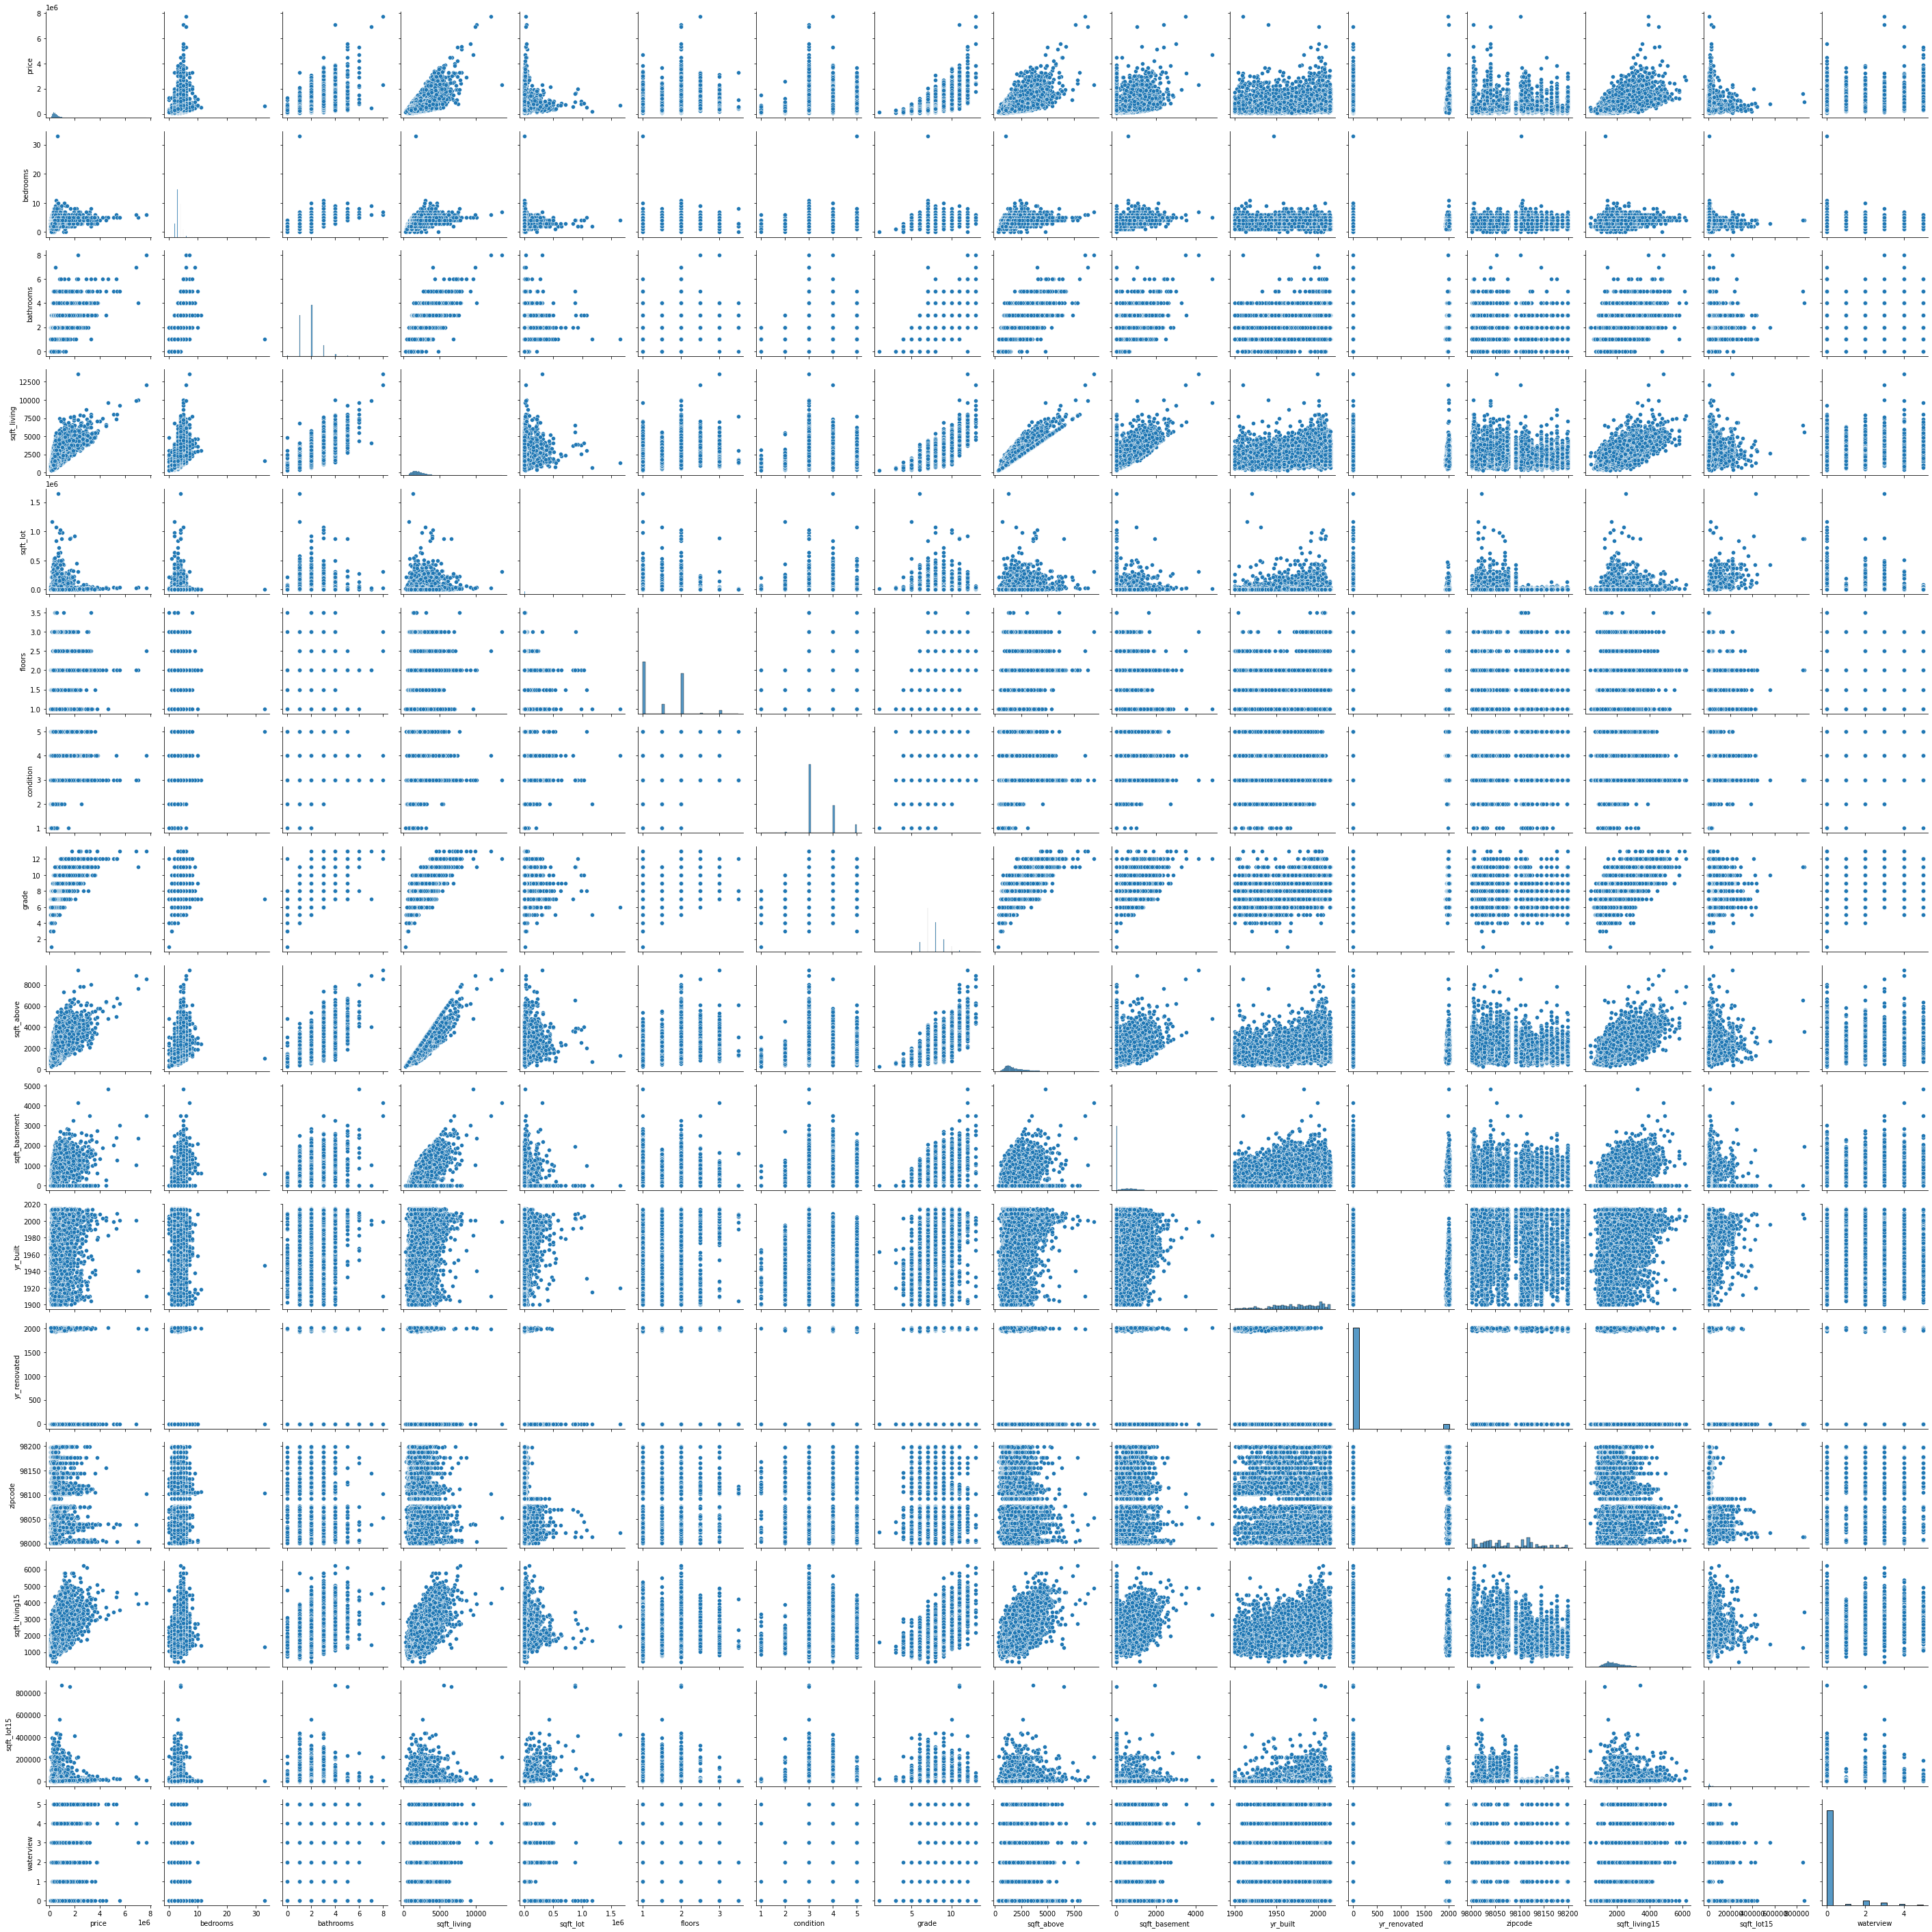

In [20]:
sns.pairplot(new_house)
plt.show()

###Multivaraite Analysis

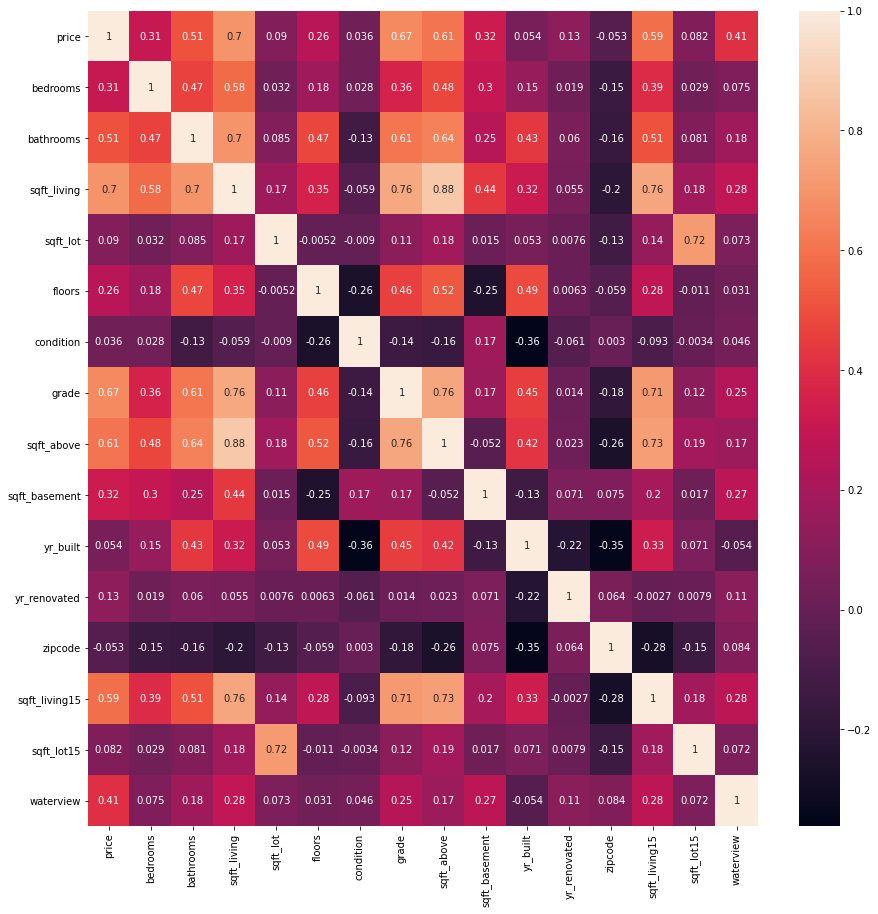

In [21]:
# correlation heat map
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(new_house.corr(),annot=True)
plt.show()

##Reression Analysis

### Linear Regression

In [40]:
# creating a model for multiple Linear regression
# let standardize our data before training 
 
regression = new_house
regression.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterview
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [19]:
#preprocessing
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler

col_names = list(regression.columns)

# perform a robust scaler transform of the dataset
trans = RobustScaler()
regression= trans.fit_transform(regression)


# convert the array back to a dataframe

regression = DataFrame(regression, columns=col_names)

In [20]:
# lets test and train our model

X = regression.drop(['price'],1)
y = regression['price']



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Training the Algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# In this case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-0.114201
bathrooms,0.090541
sqft_living,0.327950
sqft_lot,0.002479
floors,0.023259
condition,0.084253
grade,0.282197
sqft_above,0.307415
sqft_basement,0.097722
yr_built,-0.365067


In [37]:
# making predictions
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
new_house = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new_house

,Actual,Predicted
17384,-0.473611,-0.212705
722,3.497911,3.350561
2680,0.347005,0.286473
18754,0.561833,0.382426
14554,1.021514,1.835572
...,...,...
5427,1.219625,1.566987
16547,-0.354434,0.029283
4585,-0.247794,-0.273494
17762,-0.464324,-0.753987


In [28]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# our RMSE is a bit high compared to mse we need a lower rmse to get a more accurate predictions

Mean Absolute Error: 0.38346443609359604
Mean Squared Error: 0.3542875522163676
Root Mean Squared Error: 0.5952205912234284


Correlations



In [41]:
#we want to focus on our independent variables only.
independent_only = new_house.drop(columns=['sqft_above', 'sqft_living15','grade','price'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,waterview
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.029244,0.075003
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.087175,0.185568
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.183286,0.282095
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.718557,0.073443
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,-0.011269,0.030576
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.003406,0.045570
sqft_basement,0.303093,0.283770,0.435043,0.015286,-0.245705,0.174105,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.017276,0.272302
yr_built,0.154178,0.506019,0.318049,0.053080,0.489319,-0.361417,-0.133124,1.000000,-0.224874,-0.346869,-0.148122,0.409356,0.070958,-0.053684
yr_renovated,0.018841,0.050739,0.055363,0.007644,0.006338,-0.060618,0.071323,-0.224874,1.000000,0.064357,0.029398,-0.068372,0.007854,0.108907
zipcode,-0.152668,-0.203866,-0.199430,-0.129574,-0.059121,0.003026,0.074845,-0.346869,0.064357,1.000000,0.267048,-0.564072,-0.147221,0.084006


In [42]:
# checking the vif score
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
X = independent_only.iloc[:,:-1]
calc_vif(X)

# from the output, its clear that year built has high vif meaning it can be clearlay predicted
# by other variables

,variables,VIF
0,bedrooms,2.240355e+01
1,bathrooms,2.840289e+01
2,sqft_living,1.970235e+01
3,sqft_lot,2.368223e+00
4,floors,1.642873e+01
5,condition,3.469714e+01
6,sqft_basement,2.557839e+00
7,yr_built,8.997087e+03
8,yr_renovated,1.186156e+00
9,zipcode,1.563088e+06


In [47]:
X = independent_only.drop(['yr_built','yr_renovated'],axis=1)
calc_vif(X)

,variables,VIF
0,bedrooms,2.263210e+01
1,bathrooms,2.447126e+01
2,sqft_living,2.032830e+01
3,sqft_lot,2.366113e+00
4,floors,1.587683e+01
5,condition,3.148559e+01
6,sqft_basement,2.580281e+00
7,zipcode,1.406592e+06
8,lat,1.300056e+05
9,long,1.257353e+06


In [48]:
independent_only = independent_only.copy()
independent_only['years_old'] = independent_only.apply(lambda x: x['yr_built'] - x['yr_renovated'],axis=1)
X = independent_only.drop(['yr_built','yr_renovated'],axis=1)
calc_vif(X)

,variables,VIF
0,bedrooms,2.263221e+01
1,bathrooms,2.447145e+01
2,sqft_living,2.032830e+01
3,sqft_lot,2.366141e+00
4,floors,1.588381e+01
5,condition,3.159692e+01
6,sqft_basement,2.583675e+00
7,zipcode,1.412557e+06
8,lat,1.300720e+05
9,long,1.261551e+06


Residual Plot

In [51]:
# well we can work with that score

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print(residuals.mean())



             price
count  4323.000000
mean      0.017400
std       0.595035
min      -9.957016
25%      -0.227393
50%       0.038035
75%       0.318001
max       2.759501
0.01740026017243671


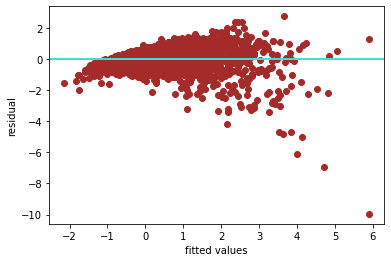

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='brown')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='turquoise', linewidth=2)
plt.show()

In [61]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

851.6818408761001
the variances are homogeneous!
